# Практическое задание
Реализовать классификацию цветков ириса c  использованием функции ошибки *Hinge loss*:

$[M_i<0] \leqslant g(M_i)= max(0,1 - M_i)$

In [1]:
from classification_helper import *
import numpy as np

In [2]:
#Загрузим данные
X, kind_iris = get_data()

Закодируте вид цветка ириса метками класса $-1$ и $1$, результат запишите в переменную $y$

In [12]:
y = kind_iris.copy()
#Ваш код здесь
#-------------
y[y=='iris setosa'] = -1
y[y=='iris virginica'] = 1
y = y.astype(int)
#----------------

assert type(y[0]) != np.str_, "Вектор y должен содержать тип int"
assert sum(y) == 0, "Неверно закодирован вид ирисов"
assert sum (y**2) == 100, "Вектор  y должен содержать значения либо -1 либо 1"

Добавим первым столбцом в матрицу признаков столбец единиц

In [4]:
def add_ones(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = add_ones(X)

Зададим начальные веса $\Theta$ случайными значениями от 0 до 1:

In [5]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.40432866 0.76280904 0.89603431]


Выпишим функцию ошибки $\tilde L$

\begin{equation*}
\tilde L = \dfrac{1}{N}\sum_{i=1}^N g(M_i) \\
g(M_i) = max(0,1 - M_i) \\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N max(0,1 - M_i) \\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N max(0,1 - y_iX_i\Theta) \\
\end{equation*}`

Вычислим частную производную от $\tilde L$ по всесу $\theta_j$:

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} =  \dfrac{1}{N}\sum_{i=1}^N\dfrac{\partial max(0,1 - y_iX_i\Theta)}{\partial \theta_j} \\
\dfrac{\partial max(0,1 - y_iX_i\Theta)}{\partial \theta_j} = 
\begin{cases}
-y_ix_{i,j}, &\text{$y_iX_i\Theta$ < 1} \\
0,  &\text{$y_iX_i\Theta \geqslant 1$}
\end{cases}
\end{equation*}

Реализуйте вычисление градиента

In [6]:
def gradient_function(Theta, X_train, y):
    grad = np.zeros_like(Theta)
    #Ваш код здесь
    #--------------------------
    M = y * (X_train @ Theta)
    for j in range(Theta.shape[0]):
        grad_j = -y*X_train[:,j]
        grad_j[M >=1] = 0
        grad[j] += np.mean(grad_j)
    #--------------------------
    return grad

Реализуйте алгоритм градинтного спуска: $\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  

In [7]:
def gradient_descent(Theta, X_train, y, alpha, iters):        
    theta = Theta
    #Ваш код здесь
    #--------------------------
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X_train, y)
    #--------------------------
    return theta

In [8]:
alpha = 0.01
iters = 500
theta_opt = gradient_descent(Theta, X_train, y, alpha, iters)

Реализуйте функцию предсказания класса цветка ириса на основе параметров $\Theta$

In [9]:
def predict_function(X_train, theta):
    #Ваш код здесь
    #--------------------------
    y_pred = np.dot(X_train, theta)
    y_pred = np.sign(y_pred)
    #--------------------------   
    return y_pred


y_pred = predict_function(X_train, theta_opt)

Посчитаем долю неверных ответов

In [10]:
def error(y, y_pred):
    return np.mean(y_pred != y)
err = error(y, y_pred)
print("Доля неверных ответов равна: ", err)
assert np.allclose(error(y, y_pred), 0.01), 'Неверно обучен классификатор'

Доля неверных ответов равна:  0.01


Нарисуем разделяющую прямую

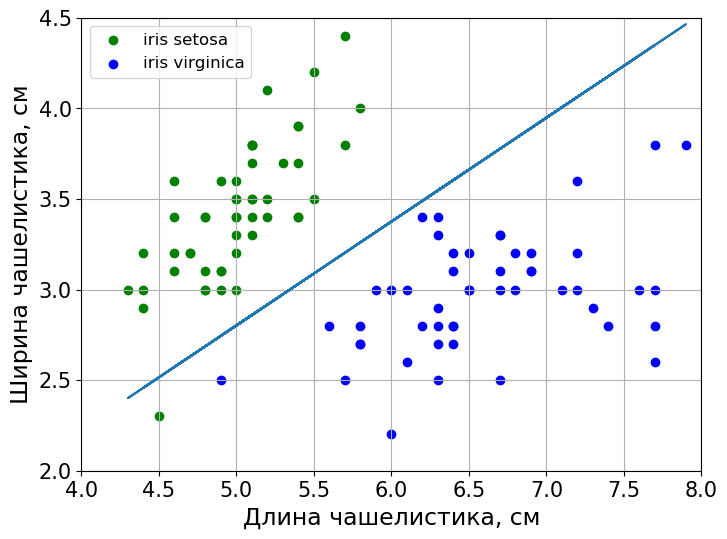

In [11]:
plot_finaly_trained_model(X, kind_iris, theta_opt)